In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from packages.functions import * # vrh, softsand, stiffsand, hertzmindlin, vels, rpt
# are the vrh inputs vectors?

In [ ]:
import matplotlib.colors as colors
#      0=shale   1=sand  2=interbedded   3=limestone 4=Salt
ccc = ['#1B4F72','#F4D03F','#DC7633','#AED6F1','red']
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

In [ ]:
# Parameters and rock properties
TEMP_RES = 70  #Celcius                                # or 77.2
PRESSURE_EFF = 16  #MPa                                # or 20
# PRESSURE_EFF = (den - den_fluid)*g x depth  # g=9.8

SALINITY = 80000  #PPM

# Fluid properties
RHO_BRINE = 1.09 # g/cm3
K_BRINE = 2.8  #GPa
RHO_OIL = 0.78  #g/cm3
K_OIL = 2.
OIL_GRAVITY = 19  #API                                # or 32
GOR = 100  #Sm3/Sm3                                   # or 64
GAS_GRAVITY = 0.6

# Rock properties
K_QUARTZ = 36.8  #GPa
MU_QUARTZ = 44  #GPa
K_CLAY = 15  #GPa
MU_CLAY = 5  #GPa

# calculate fluid bulk modulus of oil before pore-fluid substitution => use Batzle-Wang
# caluculate mineral moduli

In [3]:
from data_loading import well2_add_features
well1, well2, well3, well4, well5, well5_resist = well2_add_features()

## Well-log Analysis
Well-log analysis to define different seismic lithofacies, rock physics analysis including fluid effects and shear-velocity estimation in wells without shear logs, and log-based analysis of near- and far-offset seismic attributes for different lithofacies and pore fluids.

## Seismic Inversion
Seismic inversion of near- and far-offset partial stacks to obtain 3D cubes of near- and far-offset impedances (AI-EI).

## Probability Density Estimation
Nonparametric multivariate probability density estimation of facies and near- and far-offset seismic impedances from wells and co-located seismic inversion to obtain the training pdfs.

## Statistical and Geostatistical Classification
Statistical and geostatistical classification of the 3D seismic impedance cubes to predict most likely facies and pore fluids, and obtain the spatial distribution of probabilities of occurrence for different lithofacies and pore fluids.

### 5.2.1 Defining lithofacies from logs
Key well : well2

In [4]:
print(f"well1: {well1.columns}")
print(f"well2: {well2.columns}")
print(f"well3: {well3.columns}")
print(f"well4: {well4.columns}")
print(f"well5: {well5.columns}")

well1: Index(['DEPTH', 'VP', 'RHOB', 'GR'], dtype='object')
well2: Index(['DEPTH', 'VP', 'VS', 'RHOB', 'GR', 'NPHI', 'IGR', 'VSH_clavier', 'VSH_larionovO', 'VSH_steiber', 'VSH_larionovT', 'VSH', 'PHIE', 'IP', 'IS', 'VPVS', 'sandy-shaly', 'K0', 'FACIES', 'RESERVOIR', 'LABELS', 'FCODES'], dtype='object')
well3: Index(['DEPTH', 'VP', 'RHOB', 'GR'], dtype='object')
well4: Index(['DEPTH', 'VP', 'RHOB', 'GR'], dtype='object')
well5: Index(['DEPTH', 'VP', 'VS', 'GR', 'RHOB'], dtype='object')


Cross-plot of acoustic impedance vs Vp/Vs ratio colour-coded to volume shale

Cross-plot of acoustic impedance vs Vp/Vs ratio colour-coded to porosity

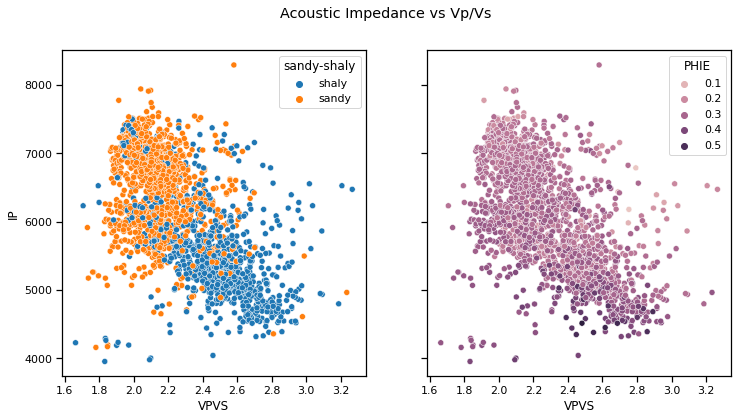

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('Acoustic Impedance vs Vp/Vs')
sns.scatterplot(ax=ax1, x=well2[well2['DEPTH']<2400]['VPVS'], y=well2['IP'], hue=well2['sandy-shaly'])
sns.scatterplot(ax=ax2, x=well2[well2['DEPTH']<2400]['VPVS'], y=well2['IP'], hue=well2['PHIE'])

for ax in fig.get_axes():
    ax.label_outer()

Histogram of acoustic impedance and Vp/Vs ratio for sandy (Vsh < 0.35) facies.

Histogram of acoustic impedance and Vp/Vs ratio for shaly (Vsh > 0.35) facies.

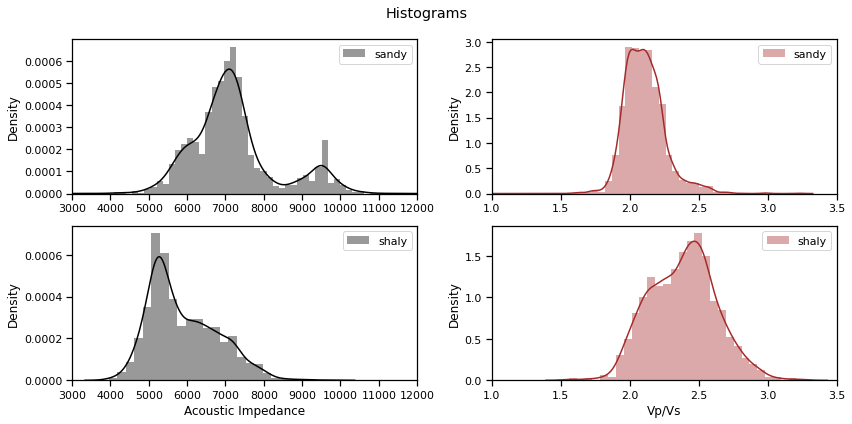

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6))
fig.suptitle('Histograms')
sns.distplot(ax=ax1, x=well2[well2['sandy-shaly']=='sandy']['IP'], color="black", label="sandy")
sns.distplot(ax=ax2, x=well2[well2['sandy-shaly']=='sandy']['VPVS'], color="brown", label="sandy")
sns.distplot(ax=ax3, x=well2[well2['sandy-shaly']=='shaly']['IP'], color="black", label="shaly")
sns.distplot(ax=ax4, x=well2[well2['sandy-shaly']=='shaly']['VPVS'], color="brown", label="shaly")

ax1.set_xlim(3000,12000)#,  ax.set_ylim(2e3,4e3)
ax3.set_xlim(3000,12000)#,  ax.set_ylim(2e3,4e3)
ax3.set_xlabel('Acoustic Impedance')

ax2.set_xlim(1,3.5)#,  ax.set_ylim(2e3,4e3)
ax4.set_xlim(1,3.5)#,  ax.set_ylim(2e3,4e3)
ax4.set_xlabel('Vp/Vs')

plt.tight_layout()
for ax in fig.get_axes():
    ax.legend()
    #ax.label_outer()

#### Facies

### 5.2.2 Pore-fluid effects

### 5.2.3 Acoustic and elastic impedance

* Shear wave not obtained in well1.
* Estimate Vs using Vp-Vs relations calibrated from wells where shear logs are available (well2, well5).
* Test various models for predicting Vs from P-wave velocity, porosity, and shale volume.
* What is the prediction error? -> Include error percent in Monte-Carlo simulations for estimating pdfs

#### Sandstones and shales
Ref Castagna et al (1985, 1993), Thomsen (1986)

In [11]:
# Vp-Vs Models
vpx = np.linspace(2.2, 3.4, 100)
vs_cast2 = -0.05508*vpx**2 + 1.0168*vpx - 1.0305
vs_cast = 0.8042*vpx - 0.8559
vs_mudrock = 0.8621*vpx - 1.1724
vs_han = 0.7936*vpx - 0.7868
vs_79 = 0.79*vpx - 0.79

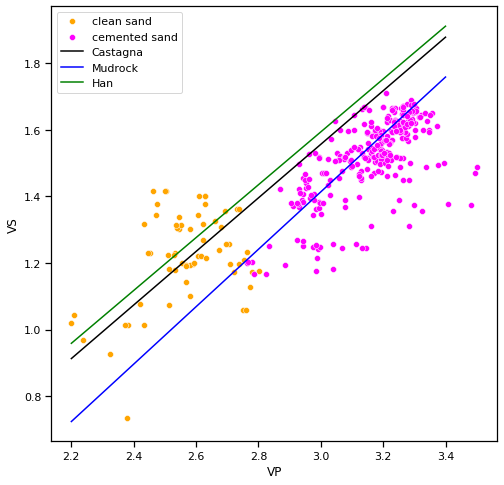

In [12]:
plt.figure(figsize=(8,8))
ll = well2[(well2.DEPTH > 2000) & (well2.DEPTH < 2400)]
#sns.scatterplot(x=ll[ll.FACIES==facies[0]]['VP'], y=ll[ll.FACIES==facies[0]]['VS'], color="black", label='shale')
#sns.scatterplot(x=ll[ll.FACIES==facies[1]]['VP'], y=ll[ll.FACIES==facies[1]]['VS'], color="brown", label='silty shale')
sns.scatterplot(x=ll[ll.LABELS=='clnSand']['VP'], y=ll[ll.LABELS=='clnSand']['VS'], color=ccc[2], label='clean sand')
#sns.scatterplot(x=ll[ll.FACIES==facies[3]]['VP'], y=ll[ll.FACIES==facies[3]]['VS'], color="purple", label='silt sand 1')
#sns.scatterplot(x=ll[ll.FACIES==facies[4]]['VP'], y=ll[ll.FACIES==facies[4]]['VS'], color="red", label='silt sand 2')
sns.scatterplot(x=ll[ll.LABELS=='cemSand']['VP'], y=ll[ll.LABELS=='cemSand']['VS'], color=ccc[5], label='cemented sand')
#plt.plot(vpx, vs_cast2, 'r', label="Castagna 2")
plt.plot(vpx, vs_cast, 'k', label="Castagna")
plt.plot(vpx, vs_mudrock, 'b', label="Mudrock")
plt.plot(vpx, vs_han, 'g', label="Han")
#plt.plot(vpx, vs_79, 'magenta', label="79")
plt.legend();

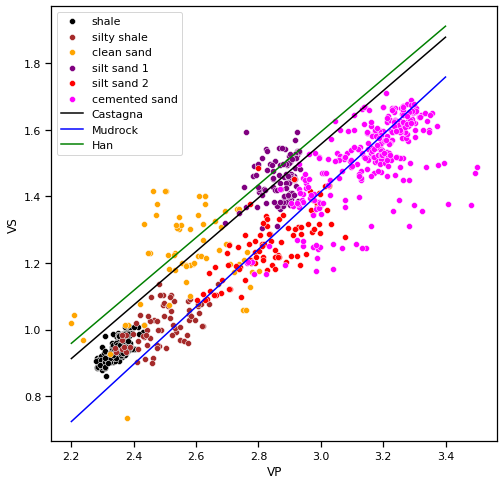

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=well2[well2.LABELS=='shale']['VP'], y=well2[well2.LABELS=='shale']['VS'], color=ccc[0], label='shale')
sns.scatterplot(x=well2[well2.LABELS=='sltShale']['VP'], y=well2[well2.LABELS=='sltShale']['VS'], color=ccc[1], label='silty shale')
sns.scatterplot(x=well2[well2.LABELS=='clnSand']['VP'], y=well2[well2.LABELS=='clnSand']['VS'], color=ccc[2], label='clean sand')
sns.scatterplot(x=well2[well2.LABELS=='sltSand1']['VP'], y=well2[well2.LABELS=='sltSand1']['VS'], color=ccc[3], label='silt sand 1')
sns.scatterplot(x=well2[well2.LABELS=='sltSand2']['VP'], y=well2[well2.LABELS=='sltSand2']['VS'], color=ccc[4], label='silt sand 2')
sns.scatterplot(x=well2[well2.LABELS=='cemSand']['VP'], y=well2[well2.LABELS=='cemSand']['VS'], color=ccc[5], label='cemented sand')
#plt.plot(vpx, vs_cast2, 'r', label="Castagna 2")
plt.plot(vpx, vs_cast, 'k', label="Castagna")
plt.plot(vpx, vs_mudrock, 'b', label="Mudrock")
plt.plot(vpx, vs_han, 'g', label="Han")
#plt.plot(vpx, vs_79, 'magenta', label="79")
plt.legend();

Use Castagna et al (1993) $V_S = 0.8042V_P - 0.8559$

In [14]:
well1['VS'] = 0.8042*well1['VP'] - 0.8559
well1['VPVS'] = well1.VP / well1.VS
well1['IP'] = well1.VP * well1.DEN
well1['IS'] = well1.VS * well1.DEN

$ I_e(\theta) = \Big(  V_P^{1+tan^2\theta} \Big) \Big( \rho^{1-4(V_S/V_P)^2\sin^2\theta} \Big) \Big( V_S^{-8(V_S/V_P)^2\sin^2\theta}  \Big) $

In [15]:
theta = 30
K = 1/well1.VPVS
a = 1 + (np.tan(np.radians(theta)))**2
b = -8 * K * (np.sin(np.radians(theta))**2)
c = 1 - 4*K*(np.sin(np.radians(theta)))**2

well1['EI30'] = (well1.VP)**a * (well1.VS)**b * (well1.DEN)**c
well1.head()

,DEPTH,VP,DEN,GR,VS,VPVS,IP,IS,EI30
0,1360.125,4.65708,2.2185,25.2231,2.889324,1.611824,10.331732,6.409965,2.821026
1,1360.250,4.40293,2.2091,27.7205,2.684936,1.639864,9.726513,5.931293,2.947808
2,1360.375,4.40173,2.1963,28.3927,2.683971,1.640006,9.667520,5.894806,2.941783
3,1360.500,4.42270,2.1834,26.6719,2.700835,1.637530,9.656523,5.897004,2.923740
4,1360.625,4.44917,2.1610,24.5829,2.722123,1.634449,9.614656,5.882507,2.898007


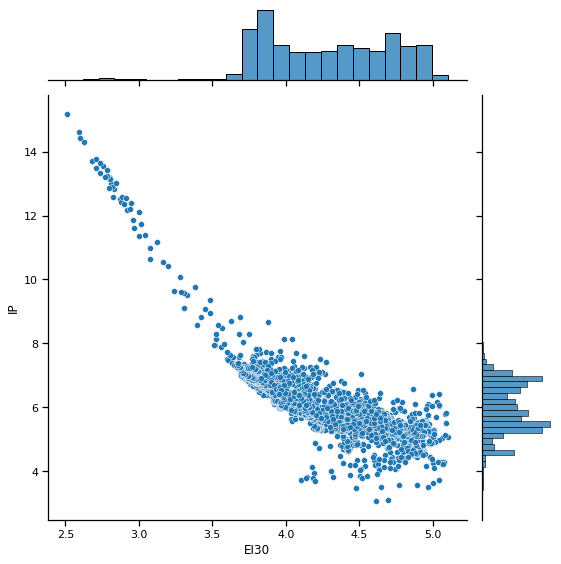

In [16]:
fig.suptitle('Acoustic Impedance vs Elastic Impedance')
sns.jointplot(x="EI30", 
              y="IP", 
              data=well1[(well1.DEPTH > 2000) & (well1.DEPTH < 2400)],
              height=8,
              )

In [17]:

theta = 30
K = 1/well2.VPVS
a = 1 + (np.tan(np.radians(theta)))**2
b = -8 * K * (np.sin(np.radians(theta))**2)
c = 1 - 4*K*(np.sin(np.radians(theta)))**2
# added 2x factor to rescale
well2['EI30'] = 2*((well2.VP)**a * (well2.VS)**b * (well2.DEN)**c)


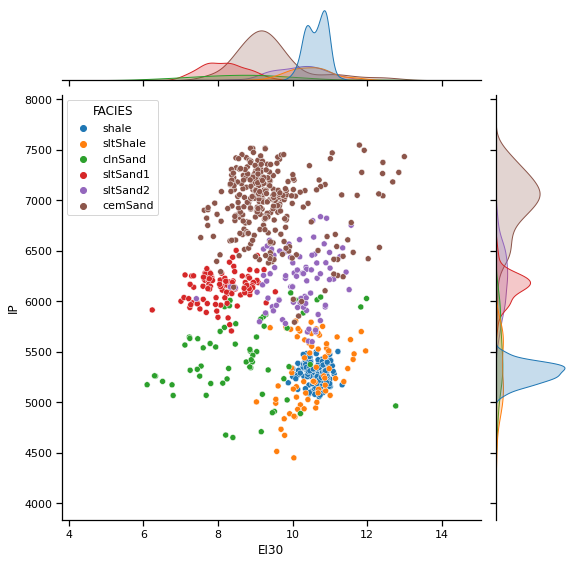

In [18]:

fig.suptitle('Acoustic Impedance vs Elastic Impedance')
sns.jointplot(ax=ax, x="EI30", 
              y="IP", 
              data=well2[well2.FACIES!='0'],
              hue='FACIES',
              height=8,
              )
#plt.figure(figsize=(8,8))
#sns.scatterplot(data=well2[well2.FACIES!='0'], x="EI30", y="IP", hue='FACIES');

### Vp ~ Porosity crossplots

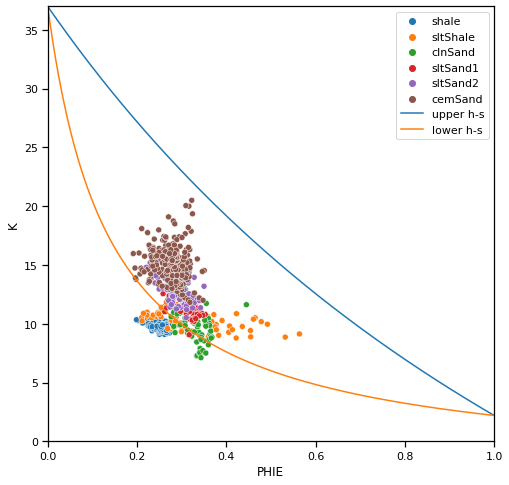

In [22]:
f1 = np.linspace(0, 1, 1000)
f2 = 1-f1
k2 = k_qz # = 37
k1 = 2.2 # k_sh # = 15
mu2 = 44 # mu_qz  #= 44
mu1 = 2 # mu_sh  #= 5

hs_upper, hs_lower = [],[]

for i in range(len(f1)):
    hs_upper.append(k2 + f1[i]/( (1/(k1-k2)) + f2[i]/(k2+(4/3.*mu2))))
    hs_lower.append(k1 + f2[i]/( (1/(k2-k1)) + f1[i]/(k1+(4/3.*mu1))))
    

xs = np.linspace(0,1,1000)
plt.figure(figsize=(8,8))
sns.scatterplot(data=well2[well2.FACIES != '0'], x='PHIE', y='K', hue='FACIES')
plt.plot(xs, hs_upper, label="upper h-s")
plt.plot(xs, hs_lower, label="lower h-s")
plt.xlim(0,1)
plt.ylim(0,k_qz)
plt.legend();

In [24]:
K0, MU0, RHO0 = K_qz, MU_qz, RHO_qz

Kdry, MUdry = softsand(K0, MU0, phi, phic, Cn, P=45)
vp_ssm, vs_ssm, rho_ssm, _ = vels(Kdry, MUdry, K0, RHO0, K_b, RHO_b, phi)

Kdry, MUdry = stiffsand(K0, MU0, phi, phic, Cn, P=45)
vp_sti, vs_sti, rho_sti, _ = vels(Kdry, MUdry, K0, RHO0, K_b, RHO_b, phi)

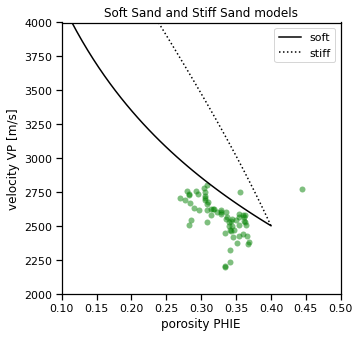

In [25]:
f, ax = plt.subplots(figsize=(5, 5))
ax.plot(well2[well2.FACIES==facies[2]]['PHIE'], well2[well2.FACIES==facies[2]]['VP']*1000, **sty1)
ax.plot(phi, vp_ssm, '-k', label="soft")
ax.plot(phi, vp_sti, ':k', label="stiff")
ax.set_xlim(0.1,0.5),  ax.set_ylim(2e3,4e3)
ax.set_xlabel('porosity PHIE')
ax.set_ylabel('velocity VP [m/s]')
ax.set_title('Soft Sand and Stiff Sand models')
plt.legend()
#plt.savefig('/Users/matt/Dropbox/Agile/SEG/Tutorials/delMonte_Apr2017/Figure_2_part1.png', dpi=300)
plt.show()

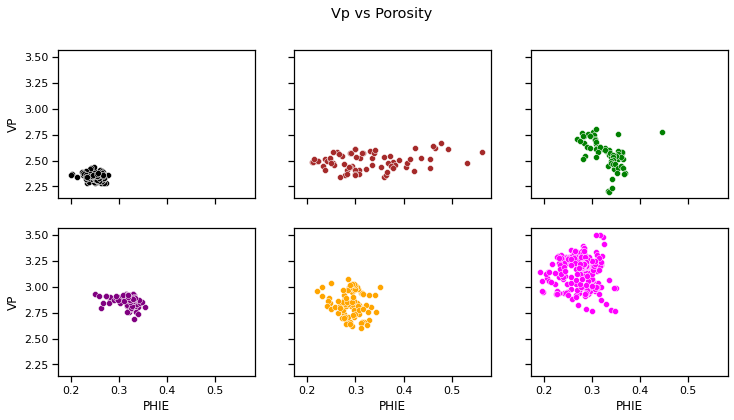

In [26]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('Vp vs Porosity')
sns.scatterplot(ax=ax1, x=well2[well2.FACIES==facies[0]]['PHIE'], y=well2[well2.FACIES==facies[0]]['VP'], color="black")
sns.scatterplot(ax=ax2, x=well2[well2.FACIES==facies[1]]['PHIE'], y=well2[well2.FACIES==facies[1]]['VP'], color="brown")
sns.scatterplot(ax=ax3, x=well2[well2.FACIES==facies[2]]['PHIE'], y=well2[well2.FACIES==facies[2]]['VP'], color="green")
sns.scatterplot(ax=ax4, x=well2[well2.FACIES==facies[3]]['PHIE'], y=well2[well2.FACIES==facies[3]]['VP'], color="purple")
sns.scatterplot(ax=ax5, x=well2[well2.FACIES==facies[4]]['PHIE'], y=well2[well2.FACIES==facies[4]]['VP'], color="orange")
sns.scatterplot(ax=ax6, x=well2[well2.FACIES==facies[5]]['PHIE'], y=well2[well2.FACIES==facies[5]]['VP'], color="magenta")

for ax in fig.get_axes():
    ax.label_outer()


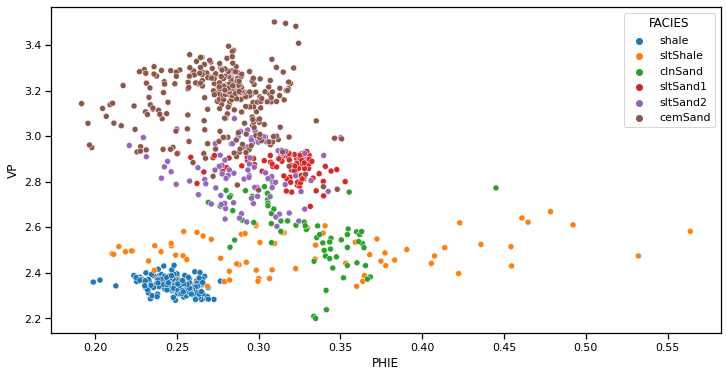

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=well2[well2.FACIES!='0'], x="PHIE", y="VP", hue='FACIES');

## 2.
Make crossplots of $V_p$ versus $V_s$. Compare with mudrock line (chapter 1) and dry rock line ($V_p/V_s=1.5$). What do $V_p-V_s$ relationships tell you about lithology and fluids?

In [28]:
vpx = np.linspace(2.2, 3.4, 100)
vs_cast2 = -0.05508*vpx**2 + 1.0168*vpx - 1.0305
vs_cast = 0.8042*vpx - 0.8559
vs_mudrock = 0.8621*vpx - 1.1724
vs_han = 0.7936*vpx - 0.7868
vs_79 = 0.79*vpx - 0.79

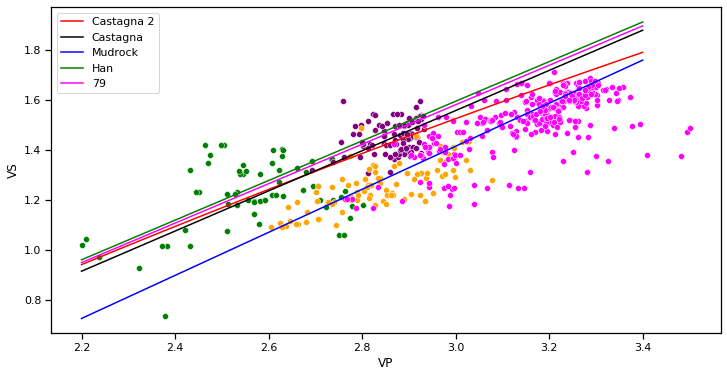

In [29]:
plt.figure(figsize=(12,6))
#sns.scatterplot(data=well2[well2.FACIES!='0'], x="VP", y="VS", hue='FACIES')
sns.scatterplot(x=well2[well2.FACIES==facies[2]]['VP'], y=well2[well2.FACIES==facies[2]]['VS'], color="green")
sns.scatterplot(x=well2[well2.FACIES==facies[3]]['VP'], y=well2[well2.FACIES==facies[3]]['VS'], color="purple")
sns.scatterplot(x=well2[well2.FACIES==facies[4]]['VP'], y=well2[well2.FACIES==facies[4]]['VS'], color="orange")
sns.scatterplot(x=well2[well2.FACIES==facies[5]]['VP'], y=well2[well2.FACIES==facies[5]]['VS'], color="magenta")
plt.plot(vpx, vs_cast2, 'r', label="Castagna 2")
plt.plot(vpx, vs_cast, 'k', label="Castagna")
plt.plot(vpx, vs_mudrock, 'b', label="Mudrock")
plt.plot(vpx, vs_han, 'g', label="Han")
plt.plot(vpx, vs_79, 'magenta', label="79")
plt.legend();

## 3.
Make crossplots of AI versus $V_p / V_s$. Superimpose on appropriate rock physics template (RPT). Interpret the trends you see in terms of fluid, porosity, lithology, sorting, cement or other effects. What can you say about seismic contrasts between reservoir sands and cap-rock shales from the RPT analysis?

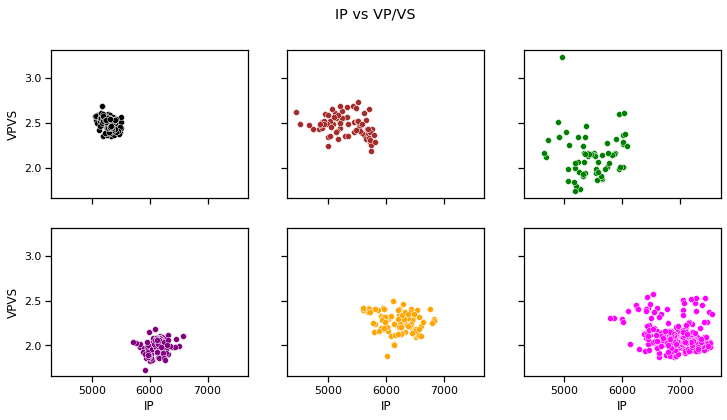

In [30]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('IP vs VP/VS')
sns.scatterplot(ax=ax1, x=well2[well2.FACIES==facies[0]]['IP'], y=well2[well2.FACIES==facies[0]]['VPVS'], color="black")
sns.scatterplot(ax=ax2, x=well2[well2.FACIES==facies[1]]['IP'], y=well2[well2.FACIES==facies[1]]['VPVS'], color="brown")
sns.scatterplot(ax=ax3, x=well2[well2.FACIES==facies[2]]['IP'], y=well2[well2.FACIES==facies[2]]['VPVS'], color="green")
sns.scatterplot(ax=ax4, x=well2[well2.FACIES==facies[3]]['IP'], y=well2[well2.FACIES==facies[3]]['VPVS'], color="purple")
sns.scatterplot(ax=ax5, x=well2[well2.FACIES==facies[4]]['IP'], y=well2[well2.FACIES==facies[4]]['VPVS'], color="orange")
sns.scatterplot(ax=ax6, x=well2[well2.FACIES==facies[5]]['IP'], y=well2[well2.FACIES==facies[5]]['VPVS'], color="magenta")

for ax in fig.get_axes():
    ax.label_outer()

In [31]:
# ip_rpt1, vpvs_rpt1 = rpt(model='stiff',vsh=0.6,fluid='oil',phic=0.4,Cn=8,P=45,f=.3)

In [32]:
# ip_rpt0, vpvs_rpt0 = rpt(model='soft',vsh=0.6,fluid='oil',phic=0.5,Cn=12,P=45,f=.3)

Interpret the trends you see in terms of:

* fluid, 
* porosity, 
* lithology, 
* sorting, 
* cement,
* other effects.

What can you say about seismic contrasts between reservoir sands and cap-rock shales from the RPT analysis?

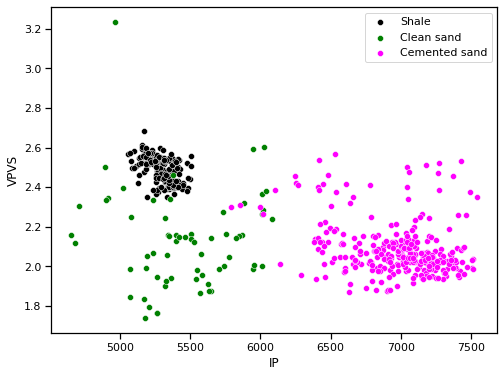

In [33]:
plt.figure(figsize=(8,6))
# plt.plot(ip_rpt0, vpvs_rpt0, 'sk', mew=0, alpha=0.5)
sns.scatterplot(x=well2[well2.FACIES==facies[0]]['IP'], y=well2[well2.FACIES==facies[0]]['VPVS'], color="black", label="Shale")
#sns.scatterplot(x=well2[well2.FACIES==facies[1]]['IP'], y=well2[well2.FACIES==facies[1]]['VPVS'], color="brown", label="Silt shale")
sns.scatterplot(x=well2[well2.FACIES==facies[2]]['IP'], y=well2[well2.FACIES==facies[2]]['VPVS'], color="green", label="Clean sand")
#sns.scatterplot(x=well2[well2.FACIES==facies[3]]['IP'], y=well2[well2.FACIES==facies[3]]['VPVS'], color="purple", label="Silt sand1")
#sns.scatterplot(x=well2[well2.FACIES==facies[4]]['IP'], y=well2[well2.FACIES==facies[4]]['VPVS'], color="orange", label="Silt sand2")
sns.scatterplot(x=well2[well2.FACIES==facies[5]]['IP'], y=well2[well2.FACIES==facies[5]]['VPVS'], color="magenta", label="Cemented sand")
plt.legend();

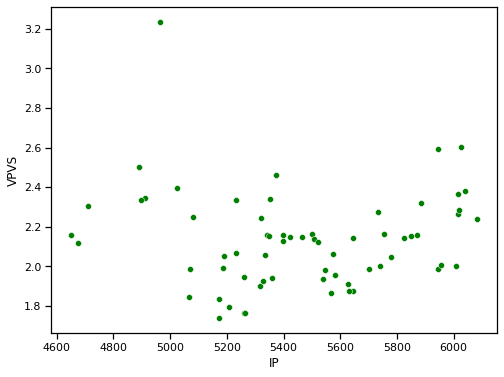

In [34]:
plt.figure(figsize=(8,6))
# plt.plot(ip_rpt1, vpvs_rpt1, 'sk', mew=0, alpha=0.5)
sns.scatterplot(x=well2[well2.FACIES==facies[2]]['IP'], y=well2[well2.FACIES==facies[2]]['VPVS'], color="green");

## 4.
Use Greenberg-Castagna or any other shear-wave prediction tool to predict $V_s$ from $V_p$ for Well 2. Assume 80% quartz, 15% feldspar and 5% clays in the sands, and 80% clays and 20% silt (quartz) in the shales. Compare predicted $V_s$ with measured $V_s$.

## 5.
Use empirical porosity trends from Well 2 together with Hertz-Mindlin model to create $V_p$-depth trends for brine-saturated sands. Assume the same mineralogical compositions as in #4. Water depth is 100 m. To create the depth trend, first fit an exponential porosity versus depth trend to the sand points in Well 2. For each depth compute the effective pressure assuming no overpressure. Finally use the porosity and effective pressure as inputs in the Hertz-Mindlin model to compute the velocity-depth trend. What can you say about the reservoir sands?

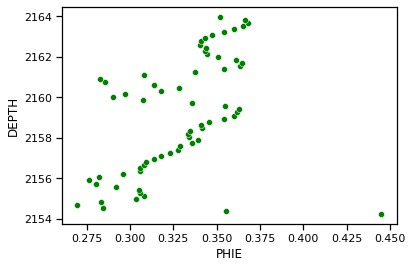

In [35]:
sns.scatterplot(x=well2[well2.FACIES==facies[2]]['PHIE'], y=well2[well2.FACIES==facies[2]]['DEPTH'], color="green");

## 10. 
Plot histograms, boxplots, cumulative distribution functions and quantile-quantile plots of:

* gamma ray
* Vp
* Vs
* density

Explore the variability in the different rock properties for the different facies

### Boxplots

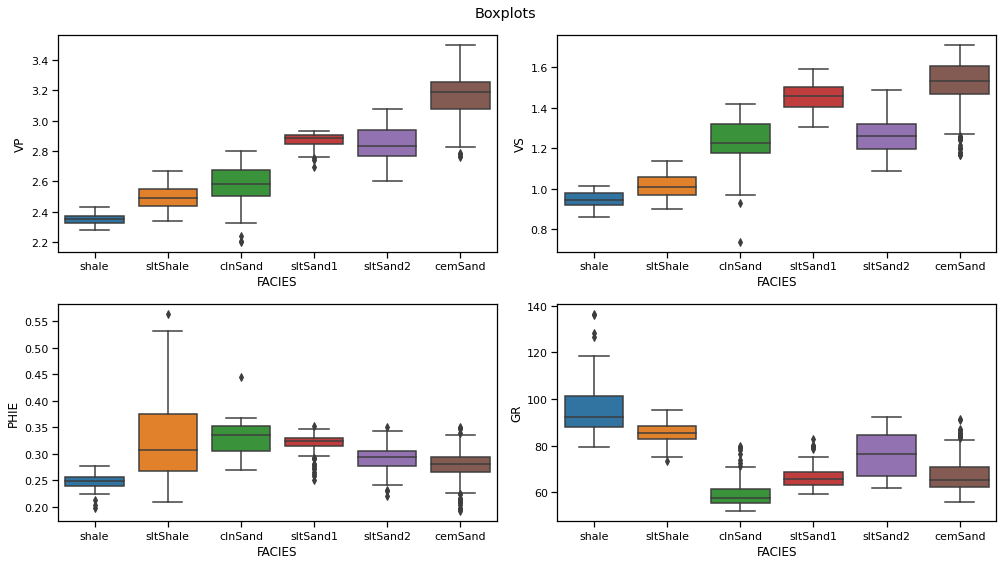

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle('Boxplots')
sns.boxplot(ax=ax1, x="FACIES", y='VP', data=well2[well2.FACIES!='0'])
sns.boxplot(ax=ax2, x="FACIES", y='VS', data=well2[well2.FACIES!='0'])
sns.boxplot(ax=ax3, x="FACIES", y='PHIE', data=well2[well2.FACIES!='0'])
sns.boxplot(ax=ax4, x="FACIES", y='GR', data=well2[well2.FACIES!='0'])
plt.tight_layout()

### Histogram / Density Plots

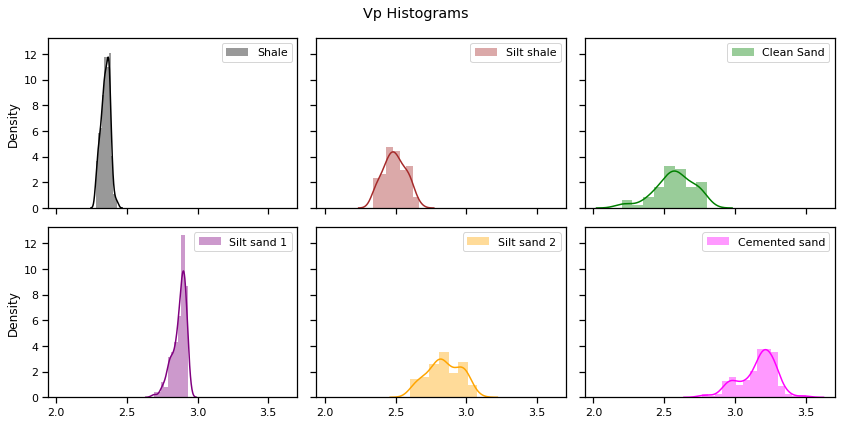

In [37]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('Vp Histograms')
sns.distplot(ax=ax1, x=well2[well2.FACIES==facies[0]]['VP'], color="black", label="Shale")
sns.distplot(ax=ax2, x=well2[well2.FACIES==facies[1]]['VP'], color="brown", label="Silt shale")
sns.distplot(ax=ax3, x=well2[well2.FACIES==facies[2]]['VP'], color="green", label="Clean Sand")
sns.distplot(ax=ax4, x=well2[well2.FACIES==facies[3]]['VP'], color="purple", label="Silt sand 1")
sns.distplot(ax=ax5, x=well2[well2.FACIES==facies[4]]['VP'], color="orange", label="Silt sand 2")
sns.distplot(ax=ax6, x=well2[well2.FACIES==facies[5]]['VP'], color="magenta", label="Cemented sand")
plt.tight_layout()
for ax in fig.get_axes():
    ax.legend()
    ax.label_outer()
    

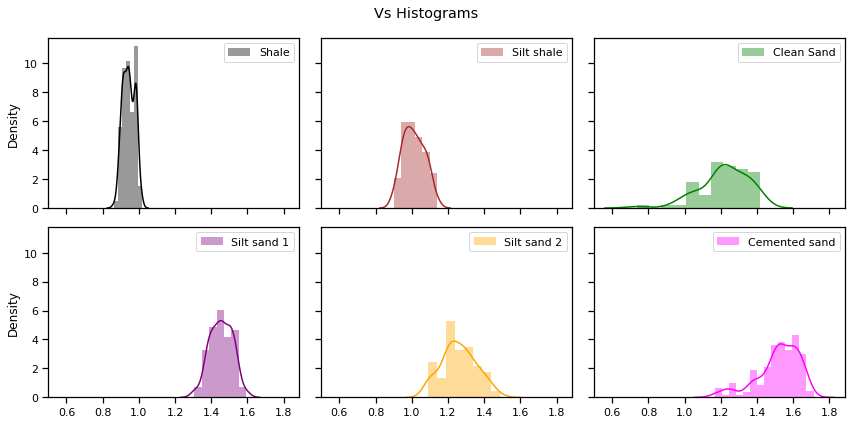

In [38]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('Vs Histograms')
sns.distplot(ax=ax1, x=well2[well2.FACIES==facies[0]]['VS'], color="black", label="Shale")
sns.distplot(ax=ax2, x=well2[well2.FACIES==facies[1]]['VS'], color="brown", label="Silt shale")
sns.distplot(ax=ax3, x=well2[well2.FACIES==facies[2]]['VS'], color="green", label="Clean Sand")
sns.distplot(ax=ax4, x=well2[well2.FACIES==facies[3]]['VS'], color="purple", label="Silt sand 1")
sns.distplot(ax=ax5, x=well2[well2.FACIES==facies[4]]['VS'], color="orange", label="Silt sand 2")
sns.distplot(ax=ax6, x=well2[well2.FACIES==facies[5]]['VS'], color="magenta", label="Cemented sand")
plt.tight_layout()
for ax in fig.get_axes():
    ax.legend()
    ax.label_outer()

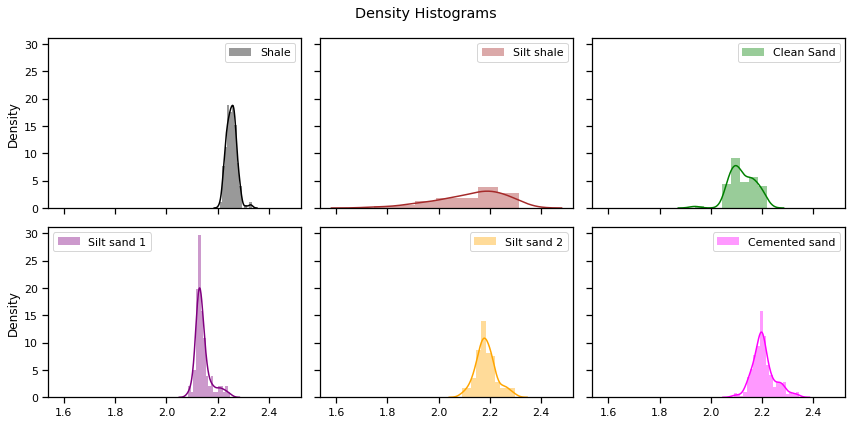

In [39]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('Density Histograms')
sns.distplot(ax=ax1, x=well2[well2.FACIES==facies[0]]['DEN'], color="black", label="Shale")
sns.distplot(ax=ax2, x=well2[well2.FACIES==facies[1]]['DEN'], color="brown", label="Silt shale")
sns.distplot(ax=ax3, x=well2[well2.FACIES==facies[2]]['DEN'], color="green", label="Clean Sand")
sns.distplot(ax=ax4, x=well2[well2.FACIES==facies[3]]['DEN'], color="purple", label="Silt sand 1")
sns.distplot(ax=ax5, x=well2[well2.FACIES==facies[4]]['DEN'], color="orange", label="Silt sand 2")
sns.distplot(ax=ax6, x=well2[well2.FACIES==facies[5]]['DEN'], color="magenta", label="Cemented sand")
plt.tight_layout()
for ax in fig.get_axes():
    ax.legend()
    ax.label_outer()

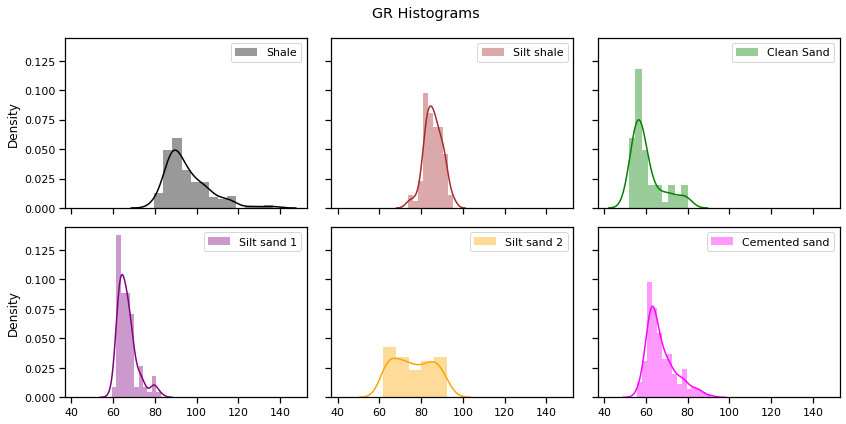

In [40]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
fig.suptitle('GR Histograms')
sns.distplot(ax=ax1, x=well2[well2.FACIES==facies[0]]['GR'], color="black", label="Shale")
sns.distplot(ax=ax2, x=well2[well2.FACIES==facies[1]]['GR'], color="brown", label="Silt shale")
sns.distplot(ax=ax3, x=well2[well2.FACIES==facies[2]]['GR'], color="green", label="Clean Sand")
sns.distplot(ax=ax4, x=well2[well2.FACIES==facies[3]]['GR'], color="purple", label="Silt sand 1")
sns.distplot(ax=ax5, x=well2[well2.FACIES==facies[4]]['GR'], color="orange", label="Silt sand 2")
sns.distplot(ax=ax6, x=well2[well2.FACIES==facies[5]]['GR'], color="magenta", label="Cemented sand")
plt.tight_layout()
for ax in fig.get_axes():
    ax.legend()
    ax.label_outer()

## 12.
Make a color-coded crossplot of gamma ray versus P-wave Impedance for the different facies. Explore qualitatively whether the clean sands (low gamma ray) can be separated from the shales (high gamma ray) using P-wave impedance.

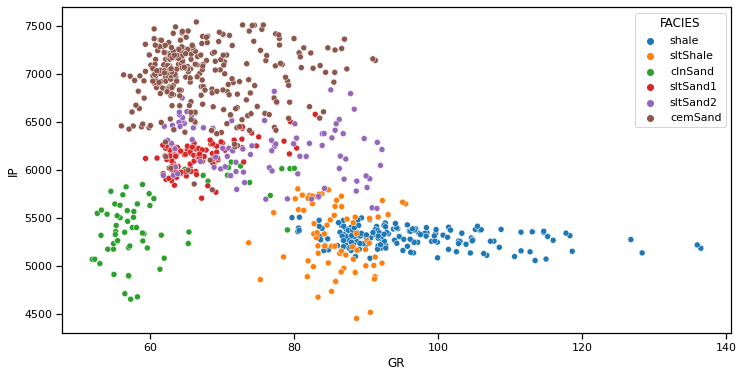

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=well2[well2.FACIES!='0'], x="GR", y="IP", hue='FACIES');